# 1b. Aproximacion a la funcion polinomial 1+2x+4x^3

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 

from matplotlib import pyplot as plt 
import numpy as np 
import math

In [2]:
#EDO de primera clase
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) #usamos el init de la clase Sequential
        self.loss_tracker = keras.metrics.Mean(name="loss") #funcion de costo
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): #paso de entrenamiento
        
        batch_size = tf.shape(data)[0]
        
        #vector de numeros aleatorios
        x = tf.random.uniform((batch_size, 1), minval = -2, maxval = 2)
        
        
        #GradientTape es la funcion que calcula derivadas
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x) #vigila todas las operaciones que se hacen con la variable x
                y_pred = self(x, training = True) #evalua la derivada de cada valor de x
            
            dy = tape2.gradient(y_pred, x)
            
            #vectores de ceros
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)

            #funcion de costo, es la ecuacion diferencial x dy/dx + y = x^2 cos(x)
            eq = x* dy +y_pred - x*x*tf.cos(x)
            
            #initial condition, y(0) = 1
            ic = y_o -0.
            #queremos que el error sea 0 
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) 
    
    #como cambia la funcion de costo, por ende, el loss, si cambian las trainable_variables (asi se llaman, ya estan definidas en la clase Sequential)
    #gradientes
        grads =tape.gradient(loss, self.trainable_variables)
    
    #muevete en direccion contraria a los gradientes, tiene como argumento el gradiente y su correspondiente variable
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #guarda un historial de la perdida de la funcion de costo
        self.loss_tracker.update_state(loss)
    
    #imprime el historial de la funcion de costo 
        return  {"loss": self.loss_tracker.result()}
    

            

In [3]:
model = ODEsolver()

model.add(Dense(10, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(1, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer =RMSprop(), metrics = ["loss"])


Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [4]:
x = tf.linspace(-1, 1, 100) 
history = model.fit(x, epochs = 1000, verbose =1) 

#dominio 
x_testv = tf.linspace(-1, 1, 100)

a = model.predict(x_testv)


Epoch 1/1000
4/4 [==============================] - 1s 2ms/step - loss: 1.1590
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7538
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7363
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7260
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5469
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6722
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5623
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4759
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6349
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3148
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5211
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4413
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 2ms/step - loss: 0.1894
Epoch 104/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1599
Epoch 105/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2597
Epoch 106/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2864
Epoch 107/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2800
Epoch 108/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2198
Epoch 109/1000
4/4 [==============================] - 0s 997us/step - loss: 0.2218
Epoch 110/1000
4/4 [==============================] - 0s 997us/step - loss: 0.2830
Epoch 111/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2148
Epoch 112/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1966
Epoch 113/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2409
Epoch 114/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1892
Epoch 115/1000
4/4 [=================

4/4 [==============================] - 0s 1ms/step - loss: 0.2163
Epoch 204/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2414
Epoch 205/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1568
Epoch 206/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1386
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1381
Epoch 208/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1422
Epoch 209/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2012
Epoch 210/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2042
Epoch 211/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1857
Epoch 212/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1824
Epoch 213/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1669
Epoch 214/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1362
Epoch 215/1000
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.0828
Epoch 304/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 305/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0814
Epoch 306/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0991
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 308/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 309/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 310/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0640
Epoch 311/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 312/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0750
Epoch 313/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0704
Epoch 314/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 315/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 405/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 406/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0366
Epoch 407/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 408/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0388
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 410/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0432
Epoch 411/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 412/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0526
Epoch 413/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 414/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 415/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0441
Epoch 416/1000
4/4 [=================

4/4 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 505/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 506/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 507/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 508/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 509/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 510/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0246
Epoch 511/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 512/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 513/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0177
Epoch 514/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 515/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 516/1000
4/4 [=====================

4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 605/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 606/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 609/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 612/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 613/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 614/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 615/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 616/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 706/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 707/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 708/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 709/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 710/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 711/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 712/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 713/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 714/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 715/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 716/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 717/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 807/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 808/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 809/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 810/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 811/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 812/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 813/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 814/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 815/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 816/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 817/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 818/1000
4/4 [=======================

4/4 [==============================] - 0s 998us/step - loss: 0.0051
Epoch 908/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 909/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 910/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 911/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 912/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 913/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 914/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 915/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 916/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 917/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 918/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0020
Epoch 919/1000
4/4 [===================

In [ ]:
#model.save("rna_edo_solver1")

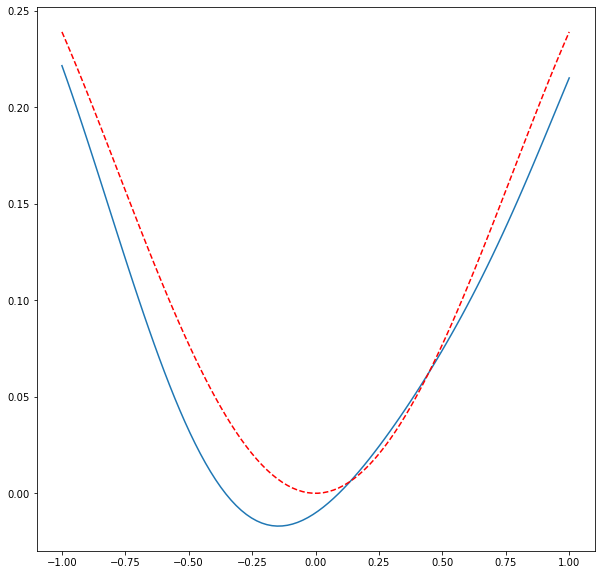

In [8]:
plt.figure(figsize = (10,10))

plt.plot(x_testv, a)

#comparamos la solucion numerica dada por la RNA con la solucion analitica
plt.plot(x_testv, x*np.sin(x) -2.*(-x*np.cos(x)+ np.sin(x))/x, color = "red", linestyle='dashed')

plt.show()
